<a href="https://colab.research.google.com/github/PolyanskayaP/FMMRAZ_6sem/blob/main/KDZ5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

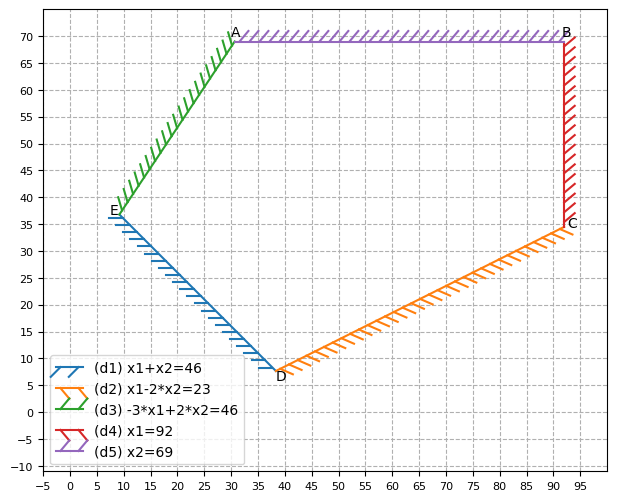

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects

d1_x1 = np.linspace(9.2, 38.33333, 100)  #для генерации последовательности чисел 0..60 в линейном пространстве с одинаковым размером шага 100
d1_x2 = 46 - d1_x1

d2_x1 = np.linspace(38.33333, 92, 100)
d2_x2 = 0.5*d2_x1 - 11.5 

d3_x1 = np.linspace(9.2, 30.667, 100)
d3_x2 = 23 + 1.5*d3_x1 

d4_x1 = [92 for i in range(100) ]
d4_x2 = np.linspace(34.5, 69, 100)

d5_x1 = np.linspace(30.667, 92, 100)
d5_x2 = [69 for i in range(100) ]

fig = plt.figure(figsize=((9,6)))
ax = fig.add_subplot(111)

ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 
plt.xlim(-5,100)  #координатная сетка от скольки до скольки 
plt.ylim(-11,75)
plt.grid(linestyle='--')
plt.xticks([i for i in range(-5,100,5)], size=8)
plt.yticks([i for i in range(-10,75,5)], size=8)

ax.plot(d1_x1, d1_x2, label="(d1) x1+x2=46",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=-135)])

ax.plot(d2_x1, d2_x2, label="(d2) x1-2*x2=23",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=-50)])

ax.plot(d3_x1, d3_x2, label="(d3) -3*x1+2*x2=46",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=50)])

ax.plot(d4_x1, d4_x2, label="(d4) x1=92",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=-50)])

ax.plot(d5_x1, d5_x2, label="(d5) x2=69",
        path_effects=[patheffects.withTickedStroke(spacing=7, angle=50)])

ax.text(30,69.9,"A")
ax.text(91.5,69.9,"B")
ax.text(92.5,34.5,"C")
ax.text(38.333,6,"D")
ax.text(7.3,36.8,"E")


ax.legend()
plt.show() 

In [9]:
xA=30.667
yA=69
xB=92
yB=69
xC=92
yC=34.5
xD=38.333
yD=7.667
xE=9.2
yE=36.8 

def f1(x1,x2):
    return x1 + x2

def f2(x1,x2):
    return -3*x1 + x2

def f3(x1,x2):
    return x1 - 3*x2 

f1_max = f1(xB,yB)   #по хорошему тоже градиентом надо или может симплексом 
f2_max = f2(xE,yE)
f3_max = f3(xD,yD) 
print(f1_max,f2_max,f3_max)

def fun_ro(x1, x2, f1_max, f2_max, f3_max):
    return (x1+x2-f1_max)**2 + (-3*x1+x2-f2_max)**2 + (x1-3*x2-f3_max)**2

def fun_ro_dx1(x1, x2, f1_max, f2_max, f3_max):
    return 2*(x1+x2-f1_max) + 2*(-3)*(-3*x1+x2-f2_max) + 2*(x1-3*x2-f3_max)   #X0 сюда потом

def fun_ro_dx2(x1, x2, f1_max, f2_max, f3_max):
    return 2*(x1+x2-f1_max) + 2*(-3*x1+x2-f2_max) + 2*(-3)*(x1-3*x2-f3_max)   #X0 сюда потом

X0 = [69, 46]  #дано
ro_dx1_X0 = fun_ro_dx1(X0[0], X0[1], f1_max, f2_max, f3_max) 
ro_dx2_X0 = fun_ro_dx2(X0[0], X0[1], f1_max, f2_max, f3_max) 
print(ro_dx1_X0, ro_dx2_X0)
#from_symp !!!!!!!!!!!!!! нашли tX1
tX1 = [9.2, 36.8]

def fun_la(X0, tX1, f1_max, f2_max, f3_max):
    okla = np.array(tX1) - np.array(X0) 
    a = X0[0]
    c = X0[1]
    b = okla[0]
    d = okla[1]
    return (-1)*((a+c-f1_max)*(b+d) + (-3*a+c-f2_max)*(-3*b+d) + (a+(-3)*c-f3_max)*(b+(-3)*d)) / ((b+d)**2 + (-3*b+d)**2 + (b+(-3)*d)**2)   

def fun_X1(X0, tX1, f1_max, f2_max, f3_max):  #[,] ret       => X0 и т д 
    okla = np.array(tX1) - np.array(X0)
    la = fun_la(X0, tX1, f1_max, f2_max, f3_max)
    return np.array(X0) + la * okla 

print(fun_X1(X0, tX1, f1_max, f2_max, f3_max)) 

161 9.2 15.332
760.536 73.59199999999998
[29.30311138 39.89278637]
